In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import matplotlib.ticker as mticker

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix # import the confusion matrix function
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from logitplots import plt_decision_boundaries

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score # import the score functions 


In [2]:
Melbourne = pd.read_csv('Melbourne01.csv')
Melbourne

C:\Users\Loc Sensei\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
3,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072130,2023,3,9,7,0,13.0,11.0,7.2,68.0,W,19.0,24.0,1011.5,0.0
1072131,2023,3,9,7,30,13.2,11.2,7.2,67.0,W,17.0,19.0,1011.7,0.0
1072132,2023,3,9,8,0,13.7,10.7,7.5,66.0,WNW,17.0,20.0,1011.7,0.0
1072133,2023,3,9,8,30,14.1,11.8,7.6,65.0,WNW,20.0,32.0,1012.0,0.0


In [3]:
Melbourne.loc[(Melbourne['RainTrace']==0)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
3,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048571,2022,6,28,16,40,12.1,7.9,3.9,57.0,N,24.0,28.0,1027.0,0.0
1048572,2022,6,28,16,40,12.1,7.9,3.9,57.0,N,24.0,28.0,1027.0,0.0
1048573,2022,6,28,16,50,11.9,8.5,3.9,58.0,N,19.0,20.0,1027.1,0.0
1048574,2022,6,28,16,50,11.9,8.5,3.9,58.0,N,19.0,20.0,1027.1,0.0


In [4]:
725147 /1072135 

0.6763579213438606

In [5]:
Melbourne = Melbourne.drop_duplicates()
Melbourne

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072130,2023,3,9,7,0,13.0,11.0,7.2,68.0,W,19.0,24.0,1011.5,0.0
1072131,2023,3,9,7,30,13.2,11.2,7.2,67.0,W,17.0,19.0,1011.7,0.0
1072132,2023,3,9,8,0,13.7,10.7,7.5,66.0,WNW,17.0,20.0,1011.7,0.0
1072133,2023,3,9,8,30,14.1,11.8,7.6,65.0,WNW,20.0,32.0,1012.0,0.0


In [6]:
Melbourne.isnull().sum()

Year         0
Month        0
Day          0
Hour         0
Min          0
Temp         0
AppTemp      0
DewPt        0
RelHum       0
WindDir      0
WindSpeed    0
WindGust     0
PressMSL     0
RainTrace    0
dtype: int64

In [7]:
Melbourne.WindDir.unique()

array(['SE', 'ESE', 'NE', 'NNE', 'ENE', 'W', 'N', 'SW', 'SSE', 'S', 'SSW',
       'WSW', 'NW', 'WNW', 'NNW', 'E', 'CALM', '1016.6', '1016.9',
       '1017.0', '1017.4', '1026.0', '1026.1', '1025.3', '1024.2',
       '1029.6', '1003.3', '1008.2', '1019.0', '1015.5', '1014.2',
       '1015.9', '1016.2', '1016.1', '1014.1', '1014.0', '1013.6',
       '1012.7', '1013.1', '1014.4', '1014.6', '1015.6', '1015.8',
       '1016.7', '1017.2', '1016.0', '1017.8', '1019.5', '1019.8',
       '1019.9', '1020.4', '1021.0', '1021.2', '1021.7', '1021.9',
       '1022.3', '1022.7', '1004.5', '1022.0', '1010.3', '1012.0',
       '1010.8', '-'], dtype=object)

In [8]:
Melbourne.RainTrace.unique()

array([0.0, 0.6, 0.2, 1.2, 1.6, 1.8, 2.6, 3.0, 3.6, 3.8, 4.0, 4.2, 4.4,
       4.6, 4.8, 5.0, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 0.4,
       0.8, 1.0, 1.4, 2.2, 5.2, 8.0, 12.4, 13.2, 13.6, 13.8, 14.2, 14.6,
       14.8, 15.2, 15.4, 2.0, 7.6, 11.4, 11.8, 12.2, 12.8, 13.0, 14.4,
       15.0, 15.8, 16.4, 17.0, 18.2, 19.4, 20.0, 21.6, 22.2, 23.4, 24.2,
       25.0, 25.6, 26.0, 26.6, 27.0, 27.4, 27.6, 28.0, 9.0, 10.4, 11.2,
       16.0, 16.6, 20.4, 21.8, 22.4, 3.4, 2.8, 3.2, 2.4, 8.2, 8.4, 9.4,
       7.8, 8.8, 7.2, 7.4, 8.6, 9.2, 9.6, 10.0, 10.2, 10.6, 10.8, 11.0,
       17.4, 9.8, 15.6, 18.6, 20.2, 21.2, 25.8, 44.2, 44.4, 45.8, 46.0,
       47.2, 11.6, 12.0, 12.6, 16.2, 16.8, 17.6, 18.0, 18.4, 19.0, 19.2,
       19.6, 19.8, 20.6, 20.8, 21.0, 27.2, 29.0, 29.6, 30.0, 30.2, 30.8,
       33.6, 34.4, 39.8, 42.6, 43.4, 43.6, 44.6, 44.8, 45.2, 45.4, 45.6,
       46.2, 46.4, 46.6, 47.6, 48.0, 48.4, 48.8, 13.4, 17.8, 17.2, 14.0,
       22.0, 24.0, 24.8, 25.4, 26.4, 26.8, 27.8, 28.4, 28.6

In [9]:
Melbourne.dtypes

Year           int64
Month          int64
Day            int64
Hour           int64
Min            int64
Temp         float64
AppTemp      float64
DewPt        float64
RelHum       float64
WindDir       object
WindSpeed    float64
WindGust     float64
PressMSL     float64
RainTrace     object
dtype: object

In [10]:
values = ['SE', 'ESE', 'NE', 'NNE', 'ENE', 'W', 'N', 'SW', 'SSE', 'S', 'SSW','WSW', 'NW', 'WNW', 'NNW', 'E']
degrees = [135.0,112.5,45.0,22.5,67.5,270.0,0,225.0,157.5,180.0,202.5,247.5,315.0,292.5,337.5,90.0]

#drop rows that contain any value in the list
Melbourne = Melbourne[Melbourne.WindDir.isin(values) == True]
Melbourne = Melbourne.query("RainTrace != '-'")
Melbourne = Melbourne.query("WindSpeed != -9999.0")
Melbourne = Melbourne.query("WindGust != -9999.0")
Melbourne = Melbourne.query("PressMSL != -9999.0")
Melbourne = Melbourne.query("RelHum != 0.0")
Melbourne['RainTrace'] = Melbourne['RainTrace'].astype(float)
Melbourne


,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072130,2023,3,9,7,0,13.0,11.0,7.2,68.0,W,19.0,24.0,1011.5,0.0
1072131,2023,3,9,7,30,13.2,11.2,7.2,67.0,W,17.0,19.0,1011.7,0.0
1072132,2023,3,9,8,0,13.7,10.7,7.5,66.0,WNW,17.0,20.0,1011.7,0.0
1072133,2023,3,9,8,30,14.1,11.8,7.6,65.0,WNW,20.0,32.0,1012.0,0.0


In [11]:
for i in range(len(degrees)):
    Melbourne['WindDir'] = Melbourne['WindDir'].replace(values[i],degrees[i])
    
Melbourne

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,135.0,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,135.0,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,135.0,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,135.0,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,112.5,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072130,2023,3,9,7,0,13.0,11.0,7.2,68.0,270.0,19.0,24.0,1011.5,0.0
1072131,2023,3,9,7,30,13.2,11.2,7.2,67.0,270.0,17.0,19.0,1011.7,0.0
1072132,2023,3,9,8,0,13.7,10.7,7.5,66.0,292.5,17.0,20.0,1011.7,0.0
1072133,2023,3,9,8,30,14.1,11.8,7.6,65.0,292.5,20.0,32.0,1012.0,0.0


In [12]:
Mel_date = pd.DataFrame({'year': Melbourne['Year'],
                   'month': Melbourne['Month'],
                   'day': Melbourne['Day'],
                         'hour' : Melbourne['Hour'],
                        'minute': Melbourne['Min']})
date_time = pd.to_datetime(Mel_date[["year", "month", "day",'hour',"minute"]])

Melbourne["date_time"] = date_time
Melbourne

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,date_time
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,135.0,11.0,13.0,1007.4,0.0,2011-01-01 00:04:00
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,135.0,11.0,11.0,1007.5,0.0,2011-01-01 00:14:00
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,135.0,11.0,13.0,1007.5,0.0,2011-01-01 00:24:00
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,135.0,11.0,11.0,1007.4,0.0,2011-01-01 00:34:00
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,112.5,9.0,9.0,1007.3,0.0,2011-01-01 00:44:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072130,2023,3,9,7,0,13.0,11.0,7.2,68.0,270.0,19.0,24.0,1011.5,0.0,2023-03-09 07:00:00
1072131,2023,3,9,7,30,13.2,11.2,7.2,67.0,270.0,17.0,19.0,1011.7,0.0,2023-03-09 07:30:00
1072132,2023,3,9,8,0,13.7,10.7,7.5,66.0,292.5,17.0,20.0,1011.7,0.0,2023-03-09 08:00:00
1072133,2023,3,9,8,30,14.1,11.8,7.6,65.0,292.5,20.0,32.0,1012.0,0.0,2023-03-09 08:30:00


In [13]:
Melbourne = Melbourne.set_index(pd.DatetimeIndex(Melbourne['date_time'])).drop(Melbourne.columns[14], axis=1)


In [14]:
Melbourne1 = Melbourne.resample("30T").mean().round(1)
Melbourne1

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
date_time,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011.0,1.0,1.0,0.0,14.0,24.8,0.0,13.5,49.0,135.0,11.0,12.3,1007.5,0.0
2011-01-01 00:30:00,2011.0,1.0,1.0,0.0,44.0,24.4,0.0,13.3,50.0,97.5,9.7,9.7,1007.3,0.0
2011-01-01 01:00:00,2011.0,1.0,1.0,1.0,14.0,23.6,0.0,13.5,52.7,52.5,7.7,8.3,1007.3,0.0
2011-01-01 01:30:00,2011.0,1.0,1.0,1.0,39.0,23.5,0.0,13.4,53.0,67.5,3.0,3.5,1007.2,0.0
2011-01-01 02:00:00,2011.0,1.0,1.0,2.0,19.0,23.6,0.0,13.4,52.0,168.8,0.0,0.0,1007.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 07:00:00,2023.0,3.0,9.0,7.0,0.0,13.0,11.0,7.2,68.0,270.0,19.0,24.0,1011.5,0.0
2023-03-09 07:30:00,2023.0,3.0,9.0,7.0,30.0,13.2,11.2,7.2,67.0,270.0,17.0,19.0,1011.7,0.0
2023-03-09 08:00:00,2023.0,3.0,9.0,8.0,0.0,13.7,10.7,7.5,66.0,292.5,17.0,20.0,1011.7,0.0


In [15]:
Melbourne1.isna().sum()

Year         5819
Month        5819
Day          5819
Hour         5819
Min          5819
Temp         5819
AppTemp      5819
DewPt        5819
RelHum       5819
WindDir      5819
WindSpeed    5819
WindGust     5819
PressMSL     5819
RainTrace    5819
dtype: int64

In [16]:
Melbourne1 = Melbourne1.interpolate(method='linear')
Melbourne1

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
date_time,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011.0,1.0,1.0,0.0,14.0,24.8,0.0,13.5,49.0,135.0,11.0,12.3,1007.5,0.0
2011-01-01 00:30:00,2011.0,1.0,1.0,0.0,44.0,24.4,0.0,13.3,50.0,97.5,9.7,9.7,1007.3,0.0
2011-01-01 01:00:00,2011.0,1.0,1.0,1.0,14.0,23.6,0.0,13.5,52.7,52.5,7.7,8.3,1007.3,0.0
2011-01-01 01:30:00,2011.0,1.0,1.0,1.0,39.0,23.5,0.0,13.4,53.0,67.5,3.0,3.5,1007.2,0.0
2011-01-01 02:00:00,2011.0,1.0,1.0,2.0,19.0,23.6,0.0,13.4,52.0,168.8,0.0,0.0,1007.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 07:00:00,2023.0,3.0,9.0,7.0,0.0,13.0,11.0,7.2,68.0,270.0,19.0,24.0,1011.5,0.0
2023-03-09 07:30:00,2023.0,3.0,9.0,7.0,30.0,13.2,11.2,7.2,67.0,270.0,17.0,19.0,1011.7,0.0
2023-03-09 08:00:00,2023.0,3.0,9.0,8.0,0.0,13.7,10.7,7.5,66.0,292.5,17.0,20.0,1011.7,0.0


In [17]:
Melbourne1.isna().sum()

Year         0
Month        0
Day          0
Hour         0
Min          0
Temp         0
AppTemp      0
DewPt        0
RelHum       0
WindDir      0
WindSpeed    0
WindGust     0
PressMSL     0
RainTrace    0
dtype: int64

In [18]:
Melbourne1.dtypes

Year         float64
Month        float64
Day          float64
Hour         float64
Min          float64
Temp         float64
AppTemp      float64
DewPt        float64
RelHum       float64
WindDir      float64
WindSpeed    float64
WindGust     float64
PressMSL     float64
RainTrace    float64
dtype: object

In [19]:
Melbourne1.loc[(Melbourne1['RainTrace']==0)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
date_time,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011.0,1.0,1.0,0.0,14.0,24.8,0.0,13.5,49.0,135.0,11.0,12.3,1007.5,0.0
2011-01-01 00:30:00,2011.0,1.0,1.0,0.0,44.0,24.4,0.0,13.3,50.0,97.5,9.7,9.7,1007.3,0.0
2011-01-01 01:00:00,2011.0,1.0,1.0,1.0,14.0,23.6,0.0,13.5,52.7,52.5,7.7,8.3,1007.3,0.0
2011-01-01 01:30:00,2011.0,1.0,1.0,1.0,39.0,23.5,0.0,13.4,53.0,67.5,3.0,3.5,1007.2,0.0
2011-01-01 02:00:00,2011.0,1.0,1.0,2.0,19.0,23.6,0.0,13.4,52.0,168.8,0.0,0.0,1007.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 07:00:00,2023.0,3.0,9.0,7.0,0.0,13.0,11.0,7.2,68.0,270.0,19.0,24.0,1011.5,0.0
2023-03-09 07:30:00,2023.0,3.0,9.0,7.0,30.0,13.2,11.2,7.2,67.0,270.0,17.0,19.0,1011.7,0.0
2023-03-09 08:00:00,2023.0,3.0,9.0,8.0,0.0,13.7,10.7,7.5,66.0,292.5,17.0,20.0,1011.7,0.0


In [20]:
155959/ 213619 

0.7300801894962526

### Models


C:\Users\LOCSEN~1\AppData\Local\Temp/ipykernel_26456/2463925074.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool))


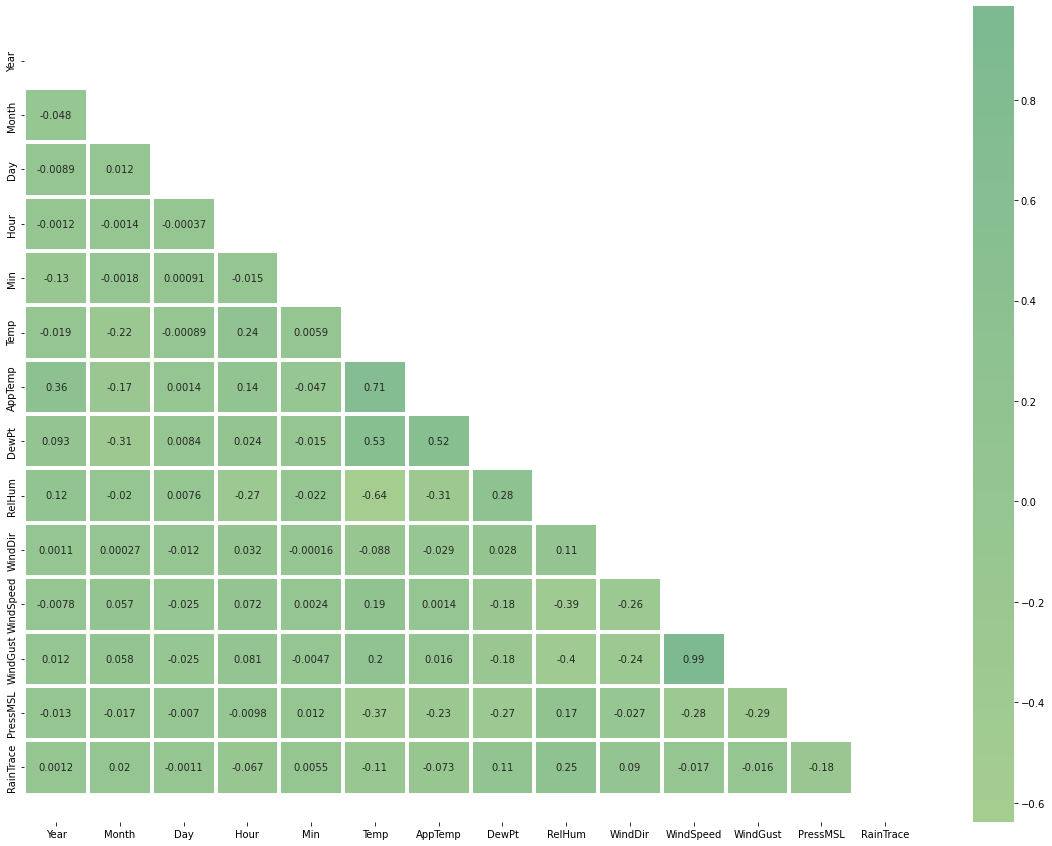

In [21]:
def plt_correlation_matrix(corrs):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe''' 
    # as this is a symmetric table, set up a mask so that we only plot values 
    # below the main diagonal
    mask = np.triu(np.ones_like(corrs, dtype=np.bool))
    f, ax = plt.subplots(figsize=(20, 15)) # initialise the plots and axes
    # plot the correlations as a seaborn heatmap, with a colourbar
    sns.heatmap(corrs, cmap="crest",mask=mask, center=5, annot=True, square=False, linewidths=4) 
    # do some fiddling so that the top and bottom are not obscured
    bottom, top = ax.get_ylim() 
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    
    
plt_correlation_matrix(Melbourne.corr()) # plot the correlation table

In [22]:
mel = Melbourne1.copy()

mel

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace
date_time,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011.0,1.0,1.0,0.0,14.0,24.8,0.0,13.5,49.0,135.0,11.0,12.3,1007.5,0.0
2011-01-01 00:30:00,2011.0,1.0,1.0,0.0,44.0,24.4,0.0,13.3,50.0,97.5,9.7,9.7,1007.3,0.0
2011-01-01 01:00:00,2011.0,1.0,1.0,1.0,14.0,23.6,0.0,13.5,52.7,52.5,7.7,8.3,1007.3,0.0
2011-01-01 01:30:00,2011.0,1.0,1.0,1.0,39.0,23.5,0.0,13.4,53.0,67.5,3.0,3.5,1007.2,0.0
2011-01-01 02:00:00,2011.0,1.0,1.0,2.0,19.0,23.6,0.0,13.4,52.0,168.8,0.0,0.0,1007.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 07:00:00,2023.0,3.0,9.0,7.0,0.0,13.0,11.0,7.2,68.0,270.0,19.0,24.0,1011.5,0.0
2023-03-09 07:30:00,2023.0,3.0,9.0,7.0,30.0,13.2,11.2,7.2,67.0,270.0,17.0,19.0,1011.7,0.0
2023-03-09 08:00:00,2023.0,3.0,9.0,8.0,0.0,13.7,10.7,7.5,66.0,292.5,17.0,20.0,1011.7,0.0


(array([2.0493e+05, 5.2970e+03, 1.8480e+03, 5.9700e+02, 3.5800e+02,
        2.1500e+02, 1.8900e+02, 1.0000e+02, 8.1000e+01, 4.0000e+00]),
 array([ 0.  ,  5.46, 10.92, 16.38, 21.84, 27.3 , 32.76, 38.22, 43.68,
        49.14, 54.6 ]),
 <BarContainer object of 10 artists>)

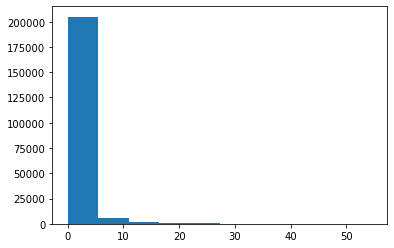

In [23]:
plt.hist(mel['RainTrace'])

In [24]:
bins = [-0.1, 0, 55]

Rain_bin = pd.cut(mel['RainTrace'] , bins=bins)
mel['Bin'] = Rain_bin
mel['bin_code'] = mel.Bin.cat.codes
print(Rain_bin)
focus_train = mel.drop(['Bin'], axis = 1)
focus_train
#focus_train.loc[(focus_train['Sales_bin_code']==2)]

date_time
2011-01-01 00:00:00    (-0.1, 0.0]
2011-01-01 00:30:00    (-0.1, 0.0]
2011-01-01 01:00:00    (-0.1, 0.0]
2011-01-01 01:30:00    (-0.1, 0.0]
2011-01-01 02:00:00    (-0.1, 0.0]
                          ...     
2023-03-09 07:00:00    (-0.1, 0.0]
2023-03-09 07:30:00    (-0.1, 0.0]
2023-03-09 08:00:00    (-0.1, 0.0]
2023-03-09 08:30:00    (-0.1, 0.0]
2023-03-09 09:00:00    (-0.1, 0.0]
Freq: 30T, Name: RainTrace, Length: 213619, dtype: category
Categories (2, interval[float64, right]): [(-0.1, 0.0] < (0.0, 55.0]]


,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,bin_code
date_time,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011.0,1.0,1.0,0.0,14.0,24.8,0.0,13.5,49.0,135.0,11.0,12.3,1007.5,0.0,0
2011-01-01 00:30:00,2011.0,1.0,1.0,0.0,44.0,24.4,0.0,13.3,50.0,97.5,9.7,9.7,1007.3,0.0,0
2011-01-01 01:00:00,2011.0,1.0,1.0,1.0,14.0,23.6,0.0,13.5,52.7,52.5,7.7,8.3,1007.3,0.0,0
2011-01-01 01:30:00,2011.0,1.0,1.0,1.0,39.0,23.5,0.0,13.4,53.0,67.5,3.0,3.5,1007.2,0.0,0
2011-01-01 02:00:00,2011.0,1.0,1.0,2.0,19.0,23.6,0.0,13.4,52.0,168.8,0.0,0.0,1007.2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 07:00:00,2023.0,3.0,9.0,7.0,0.0,13.0,11.0,7.2,68.0,270.0,19.0,24.0,1011.5,0.0,0
2023-03-09 07:30:00,2023.0,3.0,9.0,7.0,30.0,13.2,11.2,7.2,67.0,270.0,17.0,19.0,1011.7,0.0,0
2023-03-09 08:00:00,2023.0,3.0,9.0,8.0,0.0,13.7,10.7,7.5,66.0,292.5,17.0,20.0,1011.7,0.0,0


## Initiate train/test dataset

In [25]:
focus_train[(focus_train['Year']<2023)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,bin_code
date_time,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011.0,1.0,1.0,0.0,14.0,24.8,0.0,13.5,49.0,135.0,11.0,12.3,1007.5,0.0,0
2011-01-01 00:30:00,2011.0,1.0,1.0,0.0,44.0,24.4,0.0,13.3,50.0,97.5,9.7,9.7,1007.3,0.0,0
2011-01-01 01:00:00,2011.0,1.0,1.0,1.0,14.0,23.6,0.0,13.5,52.7,52.5,7.7,8.3,1007.3,0.0,0
2011-01-01 01:30:00,2011.0,1.0,1.0,1.0,39.0,23.5,0.0,13.4,53.0,67.5,3.0,3.5,1007.2,0.0,0
2011-01-01 02:00:00,2011.0,1.0,1.0,2.0,19.0,23.6,0.0,13.4,52.0,168.8,0.0,0.0,1007.2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,2022.0,12.0,31.0,21.0,30.0,24.3,27.2,18.2,68.0,247.5,11.0,15.0,1010.2,0.0,0
2022-12-31 22:00:00,2022.0,12.0,31.0,22.0,0.0,23.2,26.3,18.7,76.0,225.0,11.0,15.0,1010.4,0.0,0
2022-12-31 22:30:00,2022.0,12.0,31.0,22.0,30.0,22.4,24.4,18.8,80.0,247.5,13.0,19.0,1010.7,0.0,0


In [26]:
focus_train[(focus_train['Year']>=2023)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,bin_code
date_time,,,,,,,,,,,,,,,
2023-01-01 00:00:00,2023.0,1.0,1.0,0.000000,0.0,20.9,22.3,17.900000,83.000000,270.0,11.000000,13.000000,1010.900000,0.0,0
2023-01-01 00:30:00,2023.0,1.0,1.0,0.000000,30.0,20.7,22.2,17.700000,83.000000,270.0,9.000000,11.000000,1010.700000,0.0,0
2023-01-01 01:00:00,2023.0,1.0,1.0,1.000000,0.0,20.4,22.7,17.600000,84.000000,270.0,11.000000,13.000000,1010.700000,0.0,0
2023-01-01 01:30:00,2023.0,1.0,1.0,1.000000,30.0,19.7,20.9,17.300000,86.000000,292.5,6.000000,7.000000,1010.600000,0.0,0
2023-01-01 02:00:00,2023.0,1.0,1.0,1.666667,20.0,19.4,21.1,17.466667,88.666667,195.0,6.333333,7.666667,1010.466667,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-09 07:00:00,2023.0,3.0,9.0,7.000000,0.0,13.0,11.0,7.200000,68.000000,270.0,19.000000,24.000000,1011.500000,0.0,0
2023-03-09 07:30:00,2023.0,3.0,9.0,7.000000,30.0,13.2,11.2,7.200000,67.000000,270.0,17.000000,19.000000,1011.700000,0.0,0
2023-03-09 08:00:00,2023.0,3.0,9.0,8.000000,0.0,13.7,10.7,7.500000,66.000000,292.5,17.000000,20.000000,1011.700000,0.0,0


In [27]:
training = focus_train[(focus_train['Year']<2023)]
testing = focus_train[(focus_train['Year']>=2023)]

### kNN

In [28]:
X_train = training.drop(['RainTrace','bin_code'],axis=1)
X_test = testing.drop(['RainTrace','bin_code'],axis=1)
Y_train = training['bin_code']
Y_test = testing['bin_code']

Text(0, 0.5, 'accuracy')

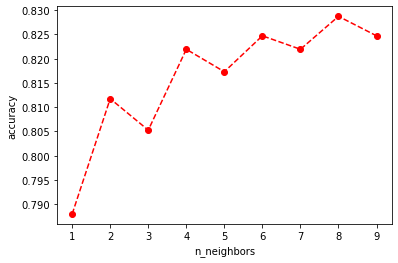

In [63]:
Accuracy = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.plot(range(1,10), Accuracy, color = 'red', linestyle = 'dashed', marker = 'o')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

In [66]:
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred) 


0.8287480680061824

### Attempt to compare the KNN plot against the Random Forest plot with only 2 most important features

In [32]:
X = X_train[['RelHum','PressMSL']]
Y = training['bin_code']
x_test = X_test[['RelHum','PressMSL']]
y_test = testing['bin_code']

knn_reduced = KNeighborsClassifier(n_neighbors = 8).fit(X, Y)
Y_pred = knn_reduced.predict(x_test)
metrics.accuracy_score(y_test, Y_pred) 


0.7669242658423493

Text(0, 0.5, 'accuracy')

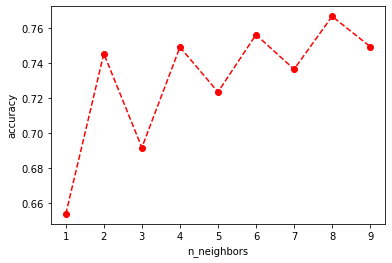

In [33]:
Accuracy = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X, Y)
    Y_pred = knn.predict(x_test)
    Accuracy.append(metrics.accuracy_score(y_test, Y_pred))
plt.plot(range(1,10), Accuracy, color = 'red', linestyle = 'dashed', marker = 'o')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

C:\Users\Loc Sensei\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PressMSL')

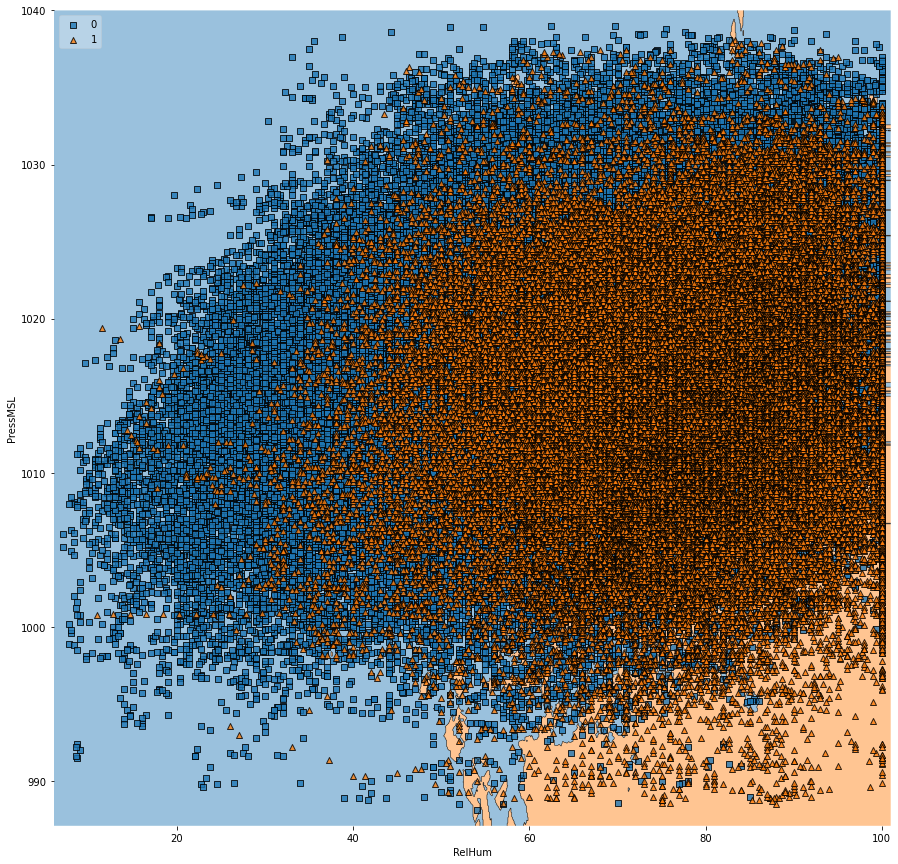

In [31]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 15))
plot_decision_regions(X.values, Y.values, clf=knn_reduced, legend = 2)
plt.xlabel("RelHum")
plt.ylabel("PressMSL")

## Random Forest 

In [29]:
acc = []
for i in range(50,250,50):
    clfa = RandomForestClassifier(n_estimators=i,random_state = 0).fit(X_train, Y_train)

    Y_pred = clfa.predict(X_test) # calculate the predicted values
    # print the accuracy of the RFC
    acc.append(accuracy_score(Y_test, Y_pred))
    
print(acc)

[0.8272024729520866, 0.8293663060278207, 0.8296754250386399, 0.8302936630602782]


- It can be seen that the number of estimators does not matter

In [49]:
clfa = RandomForestClassifier(n_estimators=50,random_state = 0).fit(X_train, Y_train)
Y_pred = clfa.predict(X_test) # calculate the predicted values
# print the accuracy of the RFC
print('Accuracy {0}'.format(np.round(accuracy_score(Y_test, Y_pred),3)))

Accuracy 0.827


In [50]:
for name, score in zip(X_train.columns, clfa.feature_importances_):
    print(name,np.round(score,3))
    

Year 0.057
Month 0.059
Day 0.079
Hour 0.068
Min 0.021
Temp 0.091
AppTemp 0.078
DewPt 0.077
RelHum 0.135
WindDir 0.093
WindSpeed 0.052
WindGust 0.059
PressMSL 0.131


- RelHum and PressMSL are highest 

<AxesSubplot:>

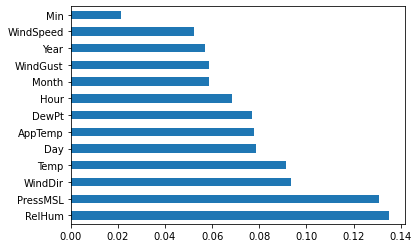

In [51]:
feature_imp = pd.Series(clfa.feature_importances_,index=X_train.columns)
feature_imp.nlargest(14).plot(kind='barh')

C:\Users\Loc Sensei\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
No handles with labels found to put in legend.


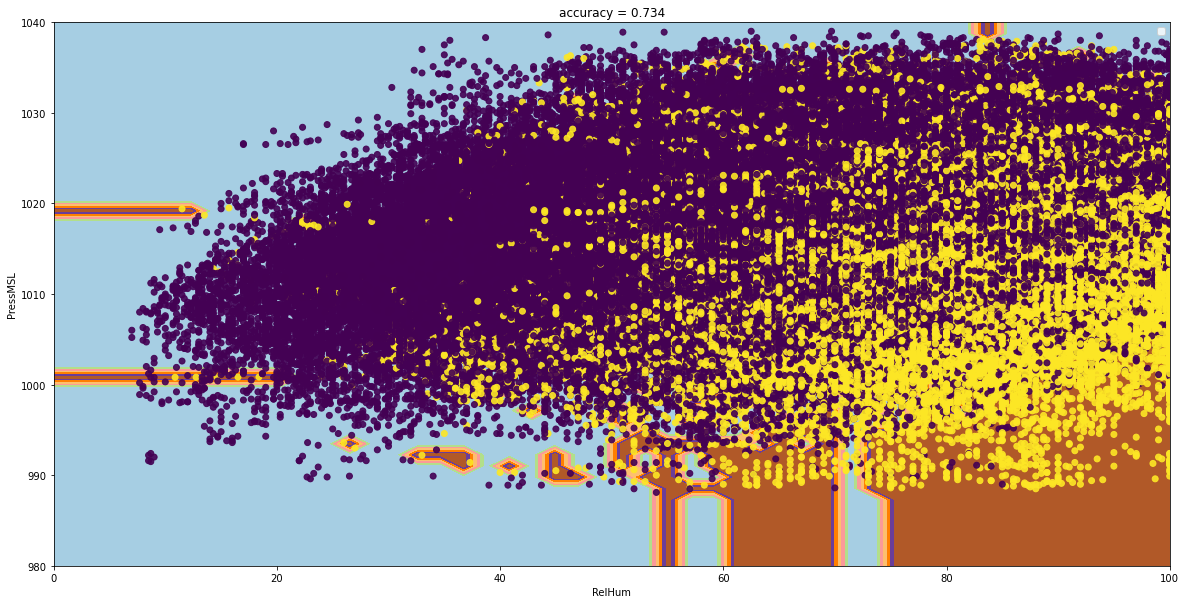

In [53]:
X = X_train[['RelHum','PressMSL']]
Y = training['bin_code']
x_test = X_test[['RelHum','PressMSL']]
y_test = testing['bin_code']

xx, yy = np.meshgrid(np.linspace(0,100), np.linspace(980,1040))

fig, ax = plt.subplots(figsize=(20,10)) # initialise the plots and axes
# instantatiate the RFC with 200 ensemble members and randomly use only half the training data
# for each ensemble members
clfaa = RandomForestClassifier(n_estimators=50,random_state=0).fit(X, Y)
plt_decision_boundaries(clfaa,xx,yy) # contour plot of the decision boundaries for this classifier
# scatter plot of the two features, coloured based on the target, alpha set the transperancy

plt.scatter(X['RelHum'],X['PressMSL'], c = Y, alpha=0.9);
Y_pred = clfaa.predict(x_test) # calculate the predicted values
accuracy = np.round(accuracy_score(y_test, Y_pred),3) # calculate the accuracy score
# add the depth and accuracy to the title
plt.title('accuracy = {0}'.format(accuracy)) 
plt.xlabel('RelHum') # x axis label
plt.ylabel('PressMSL'); # y axis label
plt.legend()

- It seems like there might be more data points indicating bin_code = 1 when PressMSL is below 1000

=> Further investigation is necessary 

### Further investigation for the distribution of data points for PressMSL 

#### If PressMSL is < 1000 Hpa

In [54]:
training.loc[(training['PressMSL']<1000)&(training['bin_code']==1)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,bin_code
date_time,,,,,,,,,,,,,,,
2011-01-14 00:30:00,2011.0,1.0,13.636364,8.909091,33.090909,26.245455,0.0,21.045455,74.081818,22.5,39.845455,47.709091,999.981818,27.490909,1
2011-01-14 01:00:00,2011.0,1.0,13.727273,7.181818,35.818182,26.509091,0.0,20.709091,71.236364,22.5,40.209091,48.281818,999.636364,27.518182,1
2011-01-14 01:30:00,2011.0,1.0,13.818182,5.454545,38.545455,26.772727,0.0,20.372727,68.390909,22.5,40.572727,48.854545,999.290909,27.545455,1
2011-01-14 02:00:00,2011.0,1.0,13.909091,3.727273,41.272727,27.036364,0.0,20.036364,65.545455,22.5,40.936364,49.427273,998.945455,27.572727,1
2011-01-14 02:30:00,2011.0,1.0,14.000000,2.000000,44.000000,27.300000,0.0,19.700000,62.700000,22.5,41.300000,50.000000,998.600000,27.600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12 04:30:00,2022.0,12.0,12.000000,4.000000,30.000000,13.700000,14.4,13.400000,98.000000,337.5,11.000000,13.000000,998.600000,12.800000,1
2022-12-12 05:00:00,2022.0,12.0,12.000000,5.000000,0.000000,13.700000,14.4,13.400000,98.000000,292.5,13.000000,19.000000,998.600000,13.200000,1
2022-12-12 05:30:00,2022.0,12.0,12.000000,5.000000,30.000000,13.600000,13.2,13.100000,97.000000,247.5,33.000000,48.000000,999.000000,13.600000,1


In [55]:
training.loc[(training['PressMSL']<1000)&(training['bin_code']==0)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,bin_code
date_time,,,,,,,,,,,,,,,
2011-02-19 09:00:00,2011.0,2.0,19.0,9.0,15.0,25.7,0.0,19.0,66.3,330.0,27.0,35.0,999.1,0.0,0
2011-02-19 09:30:00,2011.0,2.0,19.0,9.0,50.0,26.4,0.0,17.7,58.5,315.0,32.5,41.5,999.4,0.0,0
2011-02-19 10:00:00,2011.0,2.0,19.0,10.0,15.0,26.7,0.0,17.0,55.0,315.0,36.3,42.3,999.6,0.0,0
2011-06-20 20:30:00,2011.0,6.0,20.0,20.0,45.0,15.7,0.0,4.8,48.0,15.0,42.3,46.7,999.6,0.0,0
2011-06-20 21:00:00,2011.0,6.0,20.0,21.0,15.0,15.8,0.0,4.6,47.0,0.0,37.7,45.3,999.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-20 17:30:00,2022.0,11.0,20.0,17.0,30.0,17.5,12.2,5.1,44.0,337.5,33.0,52.0,997.0,0.0,0
2022-11-20 18:00:00,2022.0,11.0,20.0,18.0,0.0,17.1,11.8,4.8,44.0,315.0,37.0,72.0,997.6,0.0,0
2022-11-20 18:30:00,2022.0,11.0,20.0,18.0,30.0,16.4,12.7,6.2,51.0,315.0,20.0,32.0,997.4,0.0,0


#### If PressMSL is > 1000 Hpa

In [56]:
training.loc[(training['PressMSL']>1000)&(training['bin_code']==1)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,bin_code
date_time,,,,,,,,,,,,,,,
2011-01-08 17:30:00,2011.0,1.0,8.0,17.5,5.5,22.83,0.0,15.96,65.0,193.5,36.2,41.0,1010.99,0.06,1
2011-01-08 18:00:00,2011.0,1.0,8.0,18.0,7.0,22.46,0.0,16.02,67.0,184.5,33.4,38.0,1011.28,0.12,1
2011-01-08 18:30:00,2011.0,1.0,8.0,18.5,8.5,22.09,0.0,16.08,69.0,175.5,30.6,35.0,1011.57,0.18,1
2011-01-08 19:00:00,2011.0,1.0,8.0,19.0,10.0,21.72,0.0,16.14,71.0,166.5,27.8,32.0,1011.86,0.24,1
2011-01-08 19:30:00,2011.0,1.0,8.0,19.5,11.5,21.35,0.0,16.20,73.0,157.5,25.0,29.0,1012.15,0.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 07:00:00,2022.0,12.0,29.0,7.0,0.0,14.60,12.6,8.80,68.0,157.5,26.0,33.0,1017.90,0.80,1
2022-12-29 07:30:00,2022.0,12.0,29.0,7.0,30.0,15.00,11.8,8.50,65.0,135.0,26.0,33.0,1018.20,0.80,1
2022-12-29 08:00:00,2022.0,12.0,29.0,8.0,0.0,15.30,12.4,8.30,63.0,157.5,26.0,35.0,1018.50,0.80,1


In [57]:
training.loc[(training['PressMSL']>1000)&(training['bin_code']==0)]

,Year,Month,Day,Hour,Min,Temp,AppTemp,DewPt,RelHum,WindDir,WindSpeed,WindGust,PressMSL,RainTrace,bin_code
date_time,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011.0,1.0,1.0,0.0,14.0,24.8,0.0,13.5,49.0,135.0,11.0,12.3,1007.5,0.0,0
2011-01-01 00:30:00,2011.0,1.0,1.0,0.0,44.0,24.4,0.0,13.3,50.0,97.5,9.7,9.7,1007.3,0.0,0
2011-01-01 01:00:00,2011.0,1.0,1.0,1.0,14.0,23.6,0.0,13.5,52.7,52.5,7.7,8.3,1007.3,0.0,0
2011-01-01 01:30:00,2011.0,1.0,1.0,1.0,39.0,23.5,0.0,13.4,53.0,67.5,3.0,3.5,1007.2,0.0,0
2011-01-01 02:00:00,2011.0,1.0,1.0,2.0,19.0,23.6,0.0,13.4,52.0,168.8,0.0,0.0,1007.2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,2022.0,12.0,31.0,21.0,30.0,24.3,27.2,18.2,68.0,247.5,11.0,15.0,1010.2,0.0,0
2022-12-31 22:00:00,2022.0,12.0,31.0,22.0,0.0,23.2,26.3,18.7,76.0,225.0,11.0,15.0,1010.4,0.0,0
2022-12-31 22:30:00,2022.0,12.0,31.0,22.0,30.0,22.4,24.4,18.8,80.0,247.5,13.0,19.0,1010.7,0.0,0


- Therefore, low pressure, especially < ~1000 Hpa, rainfall occurs more 

### Actual vs Predicted 

In [58]:
a = {'Actual':y_test, 'Predicted':Y_pred}
comparee = pd.DataFrame(data=a)
comparee

,Actual,Predicted
date_time,,
2023-01-01 00:00:00,0,0
2023-01-01 00:30:00,0,0
2023-01-01 01:00:00,0,0
2023-01-01 01:30:00,0,0
2023-01-01 02:00:00,0,1
...,...,...
2023-03-09 07:00:00,0,1
2023-03-09 07:30:00,0,0
2023-03-09 08:00:00,0,1


In [59]:
df = pd.DataFrame(np.random.random((10000,3)))
df['date'] = pd.date_range('2023-01-01 08:30:00', periods=10000, freq='D')
mask = (df['date'] > '2023-01-01') & (df['date'] <= '2023-03-07')
dates=df['date'].loc[mask].values

In [60]:
daily = comparee.loc[dates]

daily

,Actual,Predicted
date_time,,
2023-01-01 08:30:00,0,0
2023-01-02 08:30:00,1,0
2023-01-03 08:30:00,1,0
2023-01-04 08:30:00,0,0
2023-01-05 08:30:00,1,0
...,...,...
2023-03-02 08:30:00,1,0
2023-03-03 08:30:00,1,0
2023-03-04 08:30:00,0,0


Accuracy: 0.734
Precision: 0.36
Recall: 0.395


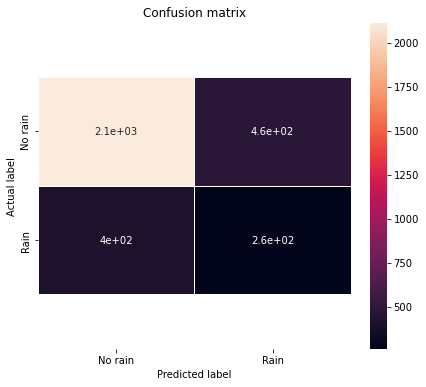

In [61]:
cnf_matrix = confusion_matrix(y_test, Y_pred) # create a confusion matrix for our actual and predicted values
# create a data frame from the confusion matrix with the column and row names being the class_names
class_names=['No rain', 'Rain'] # names of the binary classes for plotting
cmatrix = pd.DataFrame(cnf_matrix,columns=class_names,index=class_names) 
f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
plt.title('Confusion matrix') # add a title
plt.ylabel('Actual label') # add a ylabel
plt.xlabel('Predicted label') # add a xlabel
# adjust the bottom and top of the figure, so we can view all of it
bottom, top = ax.get_ylim()  # get the y axis limits
ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

print("Accuracy:",np.round(accuracy_score(y_test, Y_pred),3)) # calculate and print the accuracy score
print("Precision:",np.round(precision_score(y_test, Y_pred),3)) # calculate and print the precision score
print("Recall:",np.round(recall_score(y_test, Y_pred),3)) # calculate and print the recall score

In [62]:
daily.loc[(daily['Actual']==0) & (daily['Predicted']==1)].count()

Actual       6
Predicted    6
dtype: int64

In [63]:
daily.loc[(daily['Actual']==1) & (daily['Predicted']==0)].count()

Actual       11
Predicted    11
dtype: int64

In [108]:
17/65

0.26153846153846155

### Logistic Regression

In [29]:
X_train = training.drop(['RainTrace','bin_code'],axis=1)
X_test = testing.drop(['RainTrace','bin_code'],axis=1)
Y_train = training['bin_code']
Y_test = testing['bin_code']

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_train[0:2]

array([[-1.59320145, -1.60147693, -1.67398265, -1.66923121, -0.74904233,
         1.62706288, -1.7098065 ,  1.11010063, -1.0220466 , -0.18196258,
        -0.83139964, -0.85726908, -1.26781851],
       [-1.59320145, -1.60147693, -1.67398265, -1.66923121,  1.17580542,
         1.55500307, -1.7098065 ,  1.06056367, -0.96535711, -0.5295118 ,
        -0.9600195 , -1.07010811, -1.29407159]])

In [45]:
X_test[0:2]

array([[ 0.        , -0.96731507, -1.47463872, -1.66938378, -1.00897783,
         0.18248972,  0.66896339,  1.64614756,  1.1168305 ,  0.98610222,
        -0.91408102, -1.08958979, -0.22580911],
       [ 0.        , -0.96731507, -1.47463872, -1.66938378,  0.99649656,
         0.1392332 ,  0.64843671,  1.58576622,  1.1168305 ,  0.98610222,
        -1.14880262, -1.25877994, -0.2605684 ]])

In [31]:
logreg1 = LogisticRegression(solver='lbfgs',penalty='l2',C=5)
logreg1.fit(X_train,Y_train) # fit the training data to the model
print('Model coefficients are',np.round(logreg1.coef_,3)) # print the model coefficients c1,...,c4
print('Model intercept is',np.round(logreg1.intercept_,3)) # print the model intercept c0

y_preda = logreg1.predict_proba(X_test) # calculate the probabilities for the test features

print('Probability table for testing set is:')
print(y_preda)

Model coefficients are [[-0.214  0.054 -0.045  0.136  0.032 -0.421 -0.138 -0.083  1.077  0.464
  -0.282  0.583 -0.719]]
Model intercept is [-1.381]
Probability table for testing set is:
[[0.61958955 0.38041045]
 [0.59976806 0.40023194]
 [0.58350585 0.41649415]
 ...
 [0.47511966 0.52488034]
 [0.38109582 0.61890418]
 [0.48551867 0.51448133]]


Accuracy: 0.813
Precision: 0.555
Recall: 0.419


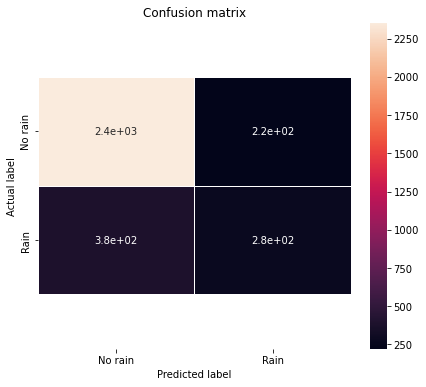

In [46]:
y_pred1=logreg1.predict(X_test)

cnf_matrix = confusion_matrix(Y_test, y_pred1) # create a confusion matrix for our actual and predicted values
# create a data frame from the confusion matrix with the column and row names being the class_names
class_names=['No rain', 'Rain'] # names of the binary classes for plotting
cmatrix = pd.DataFrame(cnf_matrix,columns=class_names,index=class_names) 
f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
plt.title('Confusion matrix') # add a title
plt.ylabel('Actual label') # add a ylabel
plt.xlabel('Predicted label') # add a xlabel
# adjust the bottom and top of the figure, so we can view all of it
bottom, top = ax.get_ylim()  # get the y axis limits
ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

print("Accuracy:",np.round(accuracy_score(Y_test, y_pred1),3)) # calculate and print the accuracy score
print("Precision:",np.round(precision_score(Y_test, y_pred1),3)) # calculate and print the precision score
print("Recall:",np.round(recall_score(Y_test, y_pred1),3)) # calculate and print the recall score

In [91]:
d = {'Actual':Y_test, 'Predicted':y_pred1}
compare = pd.DataFrame(data=d)
compare

,Actual,Predicted
date_time,,
2023-01-01 00:00:00,0,0
2023-01-01 00:30:00,0,0
2023-01-01 01:00:00,0,0
2023-01-01 01:30:00,0,0
2023-01-01 02:00:00,0,0
...,...,...
2023-03-09 07:00:00,0,1
2023-03-09 07:30:00,0,1
2023-03-09 08:00:00,0,1


In [94]:
daily1 = compare.loc[dates]

daily1

,Actual,Predicted
date_time,,
2023-01-01 08:30:00,0,0
2023-01-02 08:30:00,1,0
2023-01-03 08:30:00,1,0
2023-01-04 08:30:00,0,0
2023-01-05 08:30:00,1,0
...,...,...
2023-03-02 08:30:00,1,0
2023-03-03 08:30:00,1,0
2023-03-04 08:30:00,0,0


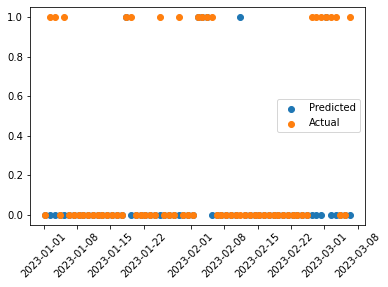

In [113]:
plt.scatter(daily1.index,daily1['Predicted'],label='Predicted')
plt.scatter(daily1.index,daily1['Actual'],label='Actual')
plt.xticks(rotation=45)
plt.legend()


In [95]:
daily1.loc[(daily1['Actual']==0) & (daily1['Predicted']==1)].count()

Actual       1
Predicted    1
dtype: int64

In [96]:
daily1.loc[(daily1['Actual']==1) & (daily1['Predicted']==0)].count()

Actual       13
Predicted    13
dtype: int64

In [114]:
14/65

0.2153846153846154

## ARIMA 

In [140]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(training.RainTrace)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


In [141]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(training.RainTrace)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              RainTrace   No. Observations:               210384
Model:                          ARIMA   Log Likelihood             -529191.324
Date:                Mon, 15 May 2023   AIC                        1058386.647
Time:                        00:10:56   BIC                        1058407.161
Sample:                    01-01-2011   HQIC                       1058392.672
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8070      0.012     65.150      0.000       0.783       0.831
sigma2         8.9606      0.009   1045.171      0.000       8.944       8.977
Ljung-Box (L1) (Q):              197520.64   Jarque-

C:\Users\Loc Sensei\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


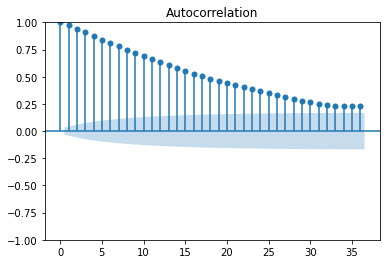

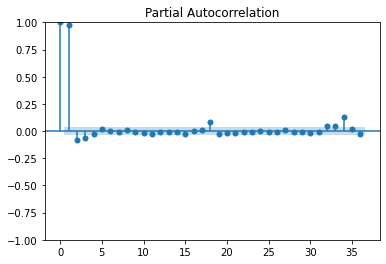

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_res = plot_acf(testing.RainTrace)

pacf_res = plot_pacf(testing.RainTrace)

- Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps

- Autocorrelation is the correlation of a time series and its lagged version over time


In [146]:
forecast_test = model_fit.forecast(len(testing.index))

forecast_test.round()

2023-01-01 00:00:00    1.0
2023-01-01 00:30:00    1.0
2023-01-01 01:00:00    1.0
2023-01-01 01:30:00    1.0
2023-01-01 02:00:00    1.0
                      ... 
2023-03-09 07:00:00    1.0
2023-03-09 07:30:00    1.0
2023-03-09 08:00:00    1.0
2023-03-09 08:30:00    1.0
2023-03-09 09:00:00    1.0
Freq: 30T, Name: predicted_mean, Length: 3235, dtype: float64

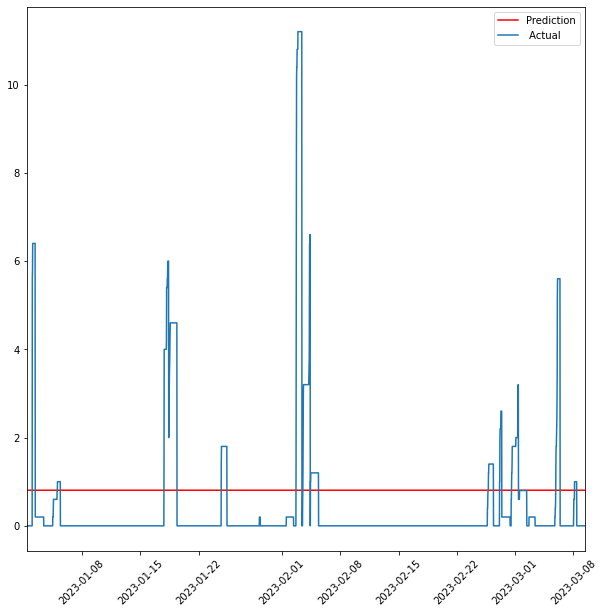

In [154]:
plt.figure(figsize=(10, 10))
plt.plot(testing.index,forecast_test,label='Prediction',color = 'red')
plt.plot(testing.index,testing.RainTrace,label=' Actual')

plt.xlim([pd.Timestamp("2023-01-01 09:00:00"), pd.Timestamp("2023-03-09 09:00:00")])
plt.xticks(rotation=45)

plt.legend()

In [156]:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(testing.RainTrace, forecast_test)
mape = mean_absolute_percentage_error(testing.RainTrace, forecast_test)

print(f'mae - manual: {mae}')
print(f'rmse - manual: {rmse}')

mae - manual: 1.0006028752509701
rmse - manual: 1.5259928811785868


- Cannot obtain any predictions on ARIMA since raintrace is dependent on other factors, not how time changes will affect rainfall